# **Data Analysis for Supply Chain**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc
from plotly.offline import iplot, init_notebook_mode
import pickle
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
from datetime import datetime
import plotly.express as px

In [23]:
# ! pip install -q kaggle

In [24]:
# from google.colab import files

In [25]:
# # Upload kaggle API key file
# from google.colab import files
# uploaded = files.upload()

# !mkdir '/root/.kaggle'
# !cp 'kaggle.json' '/root/.kaggle/.'
# !chmod 600 '/root/.kaggle/kaggle.json'

In [26]:
# !kaggle datasets download -d shashwatwork/dataco-smart-supply-chain-for-big-data-analysis

In [27]:
# !unzip dataco-smart-supply-chain-for-big-data-analysis.zip

In [2]:
path = "../../../dataco-smart-supply-chain-for-big-data-analysis"
SC=pd.read_csv(path+"/DataCoSupplyChainDataset.csv", encoding='latin1')


In [3]:
SC.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [30]:
SC.dtypes


Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market          

In [31]:
SC.head(10)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class
5,TRANSFER,6,4,18.580000,294.980011,Shipping canceled,0,73,Sporting Goods,Tonawanda,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/19/2018 11:03,Standard Class
6,DEBIT,2,1,95.180000,288.420013,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 10:42,First Class
7,TRANSFER,2,1,68.430000,285.140015,Late delivery,1,73,Sporting Goods,Miami,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 10:21,First Class
8,CASH,3,2,133.720001,278.589996,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 10:00,Second Class
9,CASH,2,1,132.149994,275.309998,Late delivery,1,73,Sporting Goods,San Ramon,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 9:39,First Class


In [32]:
SC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [ ]:
SC.info()

In [33]:
SC.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [34]:
np.sum(SC.isna())

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [35]:
SC['Customer Zipcode']=SC['Customer Zipcode'].fillna(0)
SC['Order Zipcode']=SC['Order Zipcode'].fillna(0)
SC['Customer Fname']=SC['Customer Fname'].fillna("NotDetermined")
SC['Customer Full Name'] = SC['Customer Fname'].astype(str)+SC['Customer Lname'].astype(str)

In [36]:
SCData=SC.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Product Description','Product Image','Order Zipcode','Customer Zipcode'],axis=1)
SCData.shape

(180519, 44)

In [37]:
SCData.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Card Id', 'Product Category Id', 'Product Name',
       'Product Price', 'shipping date (DateOrders)', 'Shipping Mode',
       'Customer Full Name'],
      dtype='object')

In [38]:
SCData.columns = [col.lower().replace(' ', '_') for col in SCData.columns]
SCData.rename(columns=lambda x: x.replace("(", "").replace(")", ""), inplace=True)

In [39]:
SCData.columns

Index(['type', 'days_for_shipping_real', 'days_for_shipment_scheduled',
       'benefit_per_order', 'sales_per_customer', 'delivery_status',
       'late_delivery_risk', 'category_id', 'category_name', 'customer_city',
       'customer_country', 'customer_id', 'customer_segment', 'customer_state',
       'department_id', 'department_name', 'latitude', 'longitude', 'market',
       'order_city', 'order_country', 'order_customer_id',
       'order_date_dateorders', 'order_id', 'order_item_cardprod_id',
       'order_item_discount', 'order_item_discount_rate', 'order_item_id',
       'order_item_product_price', 'order_item_profit_ratio',
       'order_item_quantity', 'sales', 'order_item_total',
       'order_profit_per_order', 'order_region', 'order_state', 'order_status',
       'product_card_id', 'product_category_id', 'product_name',
       'product_price', 'shipping_date_dateorders', 'shipping_mode',
       'customer_full_name'],
      dtype='object')

In [40]:
SCData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   type                         180519 non-null  object 
 1   days_for_shipping_real       180519 non-null  int64  
 2   days_for_shipment_scheduled  180519 non-null  int64  
 3   benefit_per_order            180519 non-null  float64
 4   sales_per_customer           180519 non-null  float64
 5   delivery_status              180519 non-null  object 
 6   late_delivery_risk           180519 non-null  int64  
 7   category_id                  180519 non-null  int64  
 8   category_name                180519 non-null  object 
 9   customer_city                180519 non-null  object 
 10  customer_country             180519 non-null  object 
 11  customer_id                  180519 non-null  int64  
 12  customer_segment             180519 non-null  object 
 13 

In [41]:
SCData[['customer_country','customer_city', 'order_country','order_city']]

,customer_country,customer_city,order_country,order_city
0,Puerto Rico,Caguas,Indonesia,Bekasi
1,Puerto Rico,Caguas,India,Bikaner
2,EE. UU.,San Jose,India,Bikaner
3,EE. UU.,Los Angeles,Australia,Townsville
4,Puerto Rico,Caguas,Australia,Townsville
...,...,...,...,...
180514,EE. UU.,Brooklyn,China,Shanghái
180515,EE. UU.,Bakersfield,Japón,Hirakata
180516,EE. UU.,Bristol,Australia,Adelaide
180517,Puerto Rico,Caguas,Australia,Adelaide


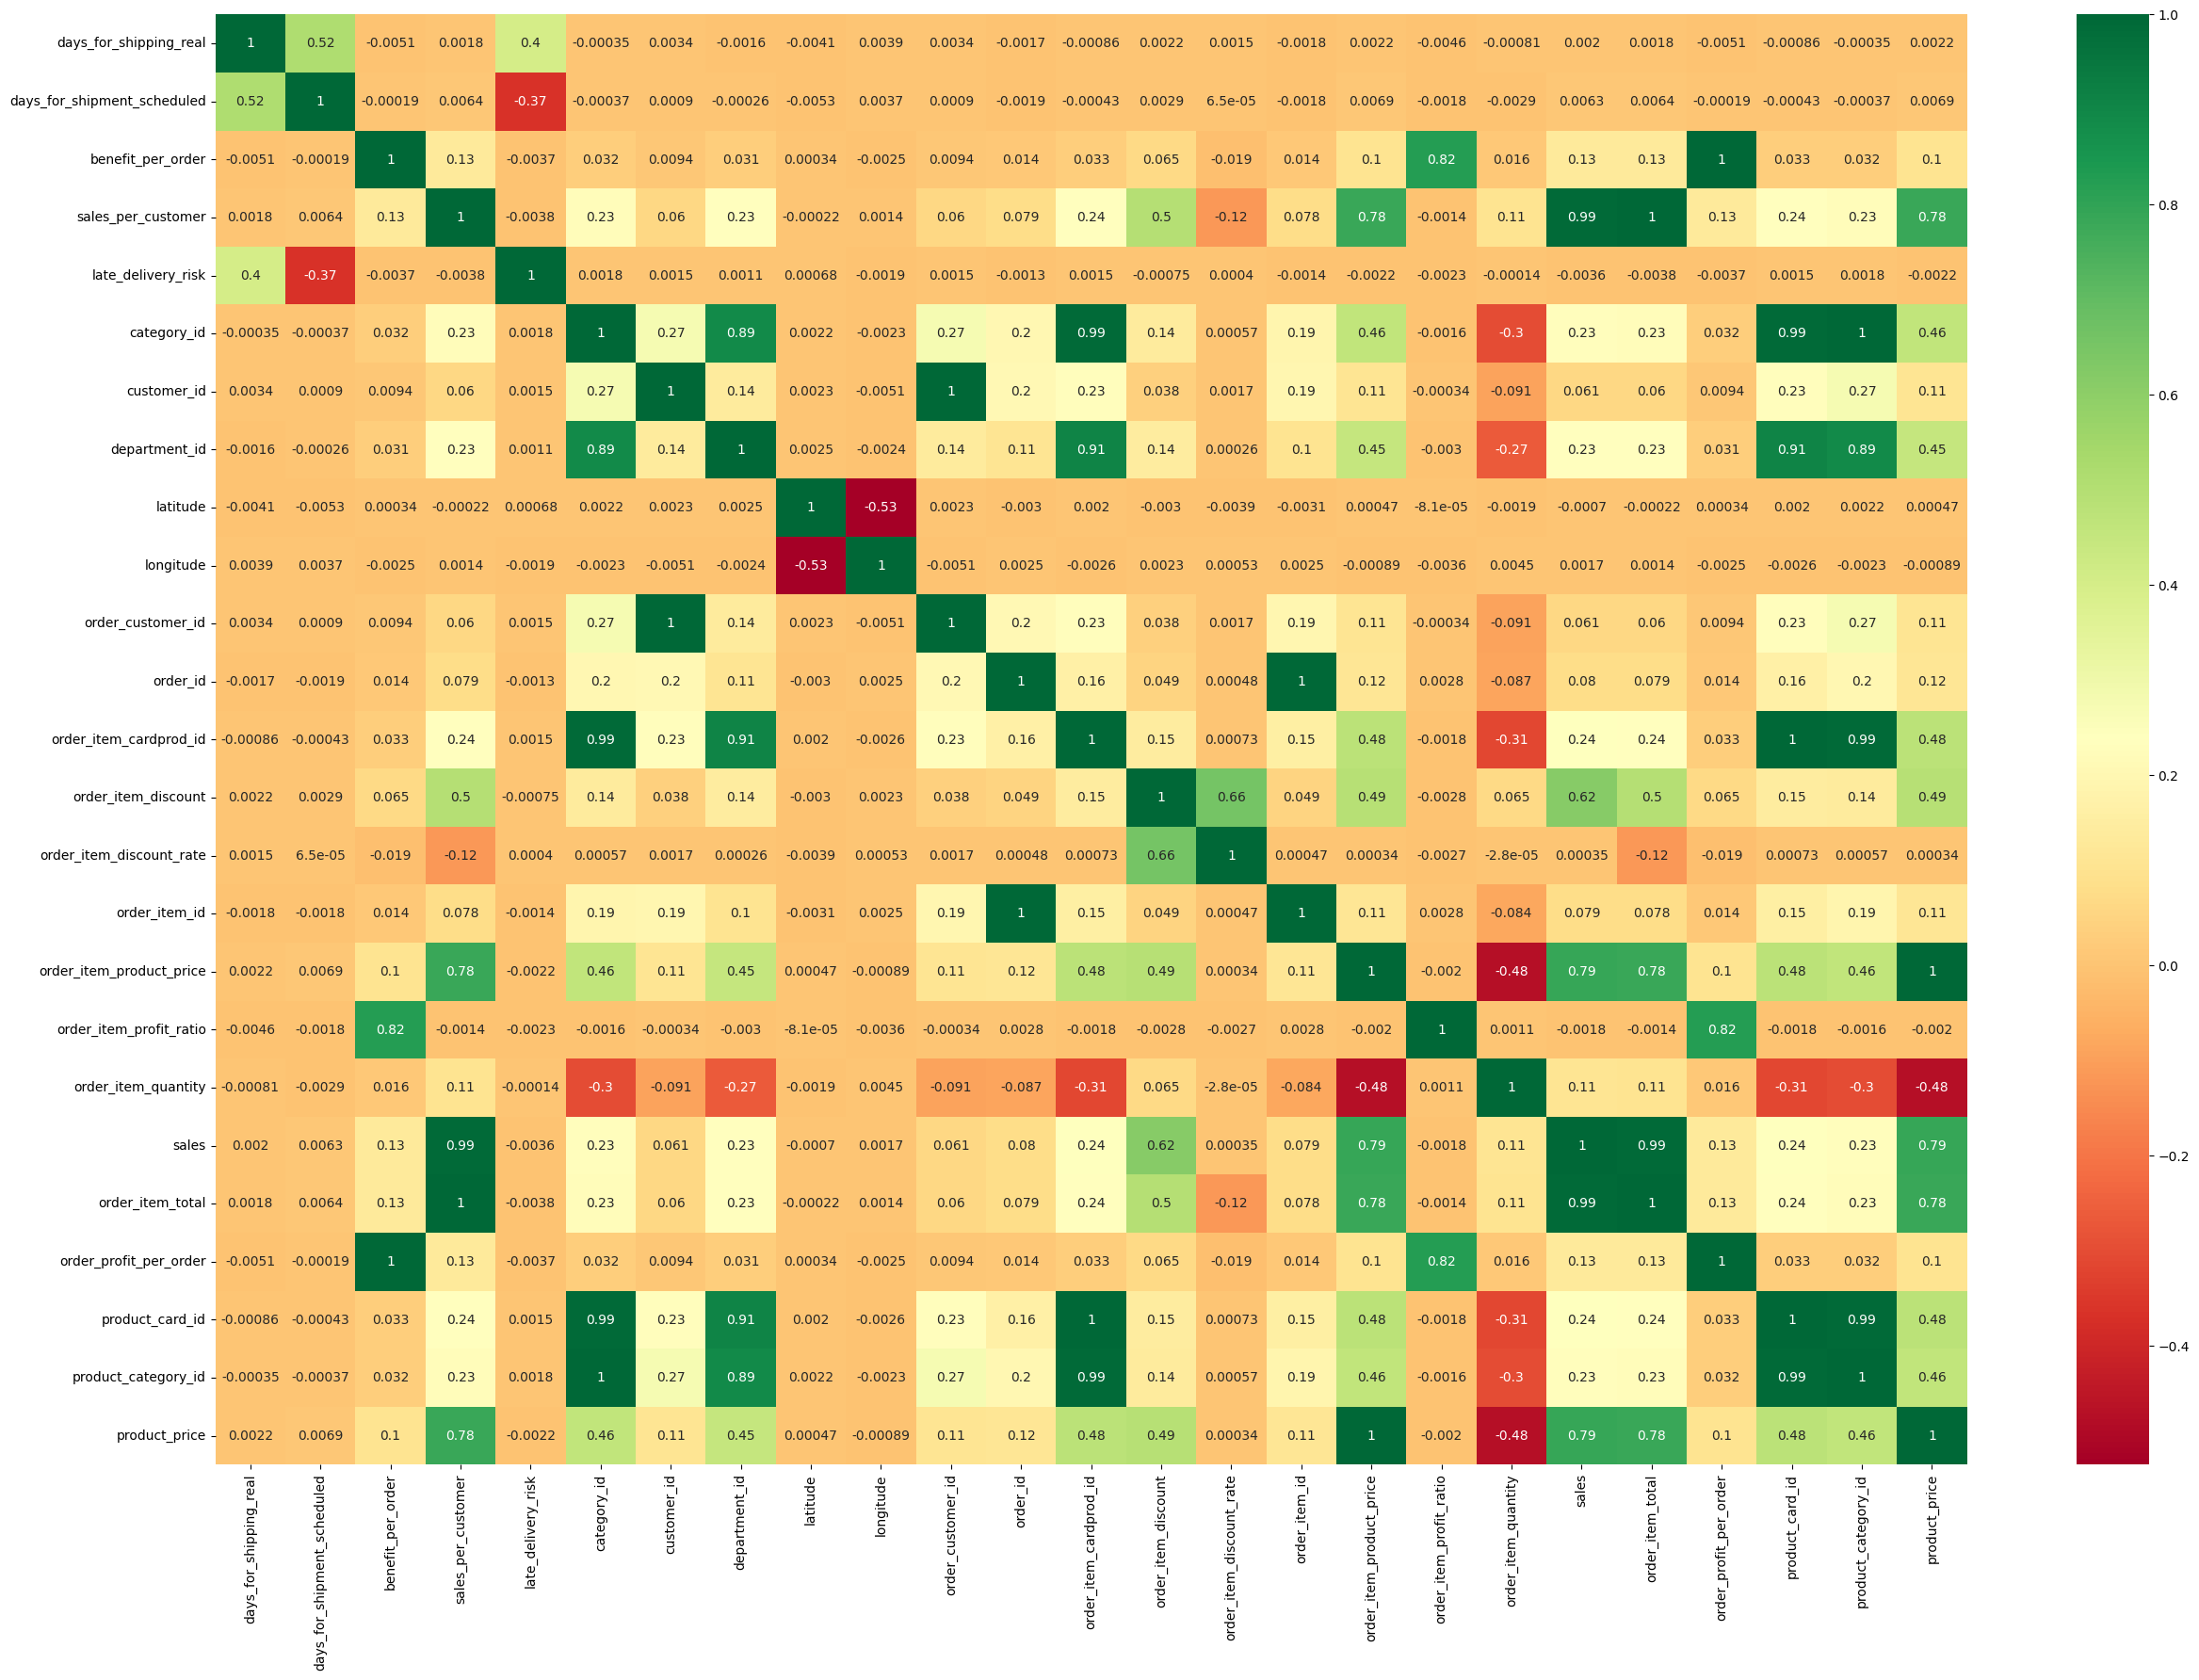

In [42]:
# Identify non-numeric columns
non_numeric_columns = SCData.select_dtypes(exclude=['float64', 'int64']).columns

# Drop non-numeric columns
SCData_numeric = SCData.drop(columns=non_numeric_columns)

# Compute correlation matrix
corrmap = SCData_numeric.corr()
top=corrmap.index
plt.figure(figsize=(30,20))
g=sns.heatmap(SCData[top].corr(),annot=True,cmap="RdYlGn")

In [43]:
feature = ['days_for_shipment_scheduled','category_name','customer_city','customer_country','customer_segment','customer_state','department_name','market','product_name','product_price','shipping_mode','order_item_quantity']
train_SC = SCData[feature]
# train_SC = SCData[['days_for_shipment_scheduled','category_id','customer_city','customer_country','customer_id','customer_segment','customer_state','department_name','market','product_name','product_price','shipping_mode','order_item_quantity']]

In [44]:
train_SC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   days_for_shipment_scheduled  180519 non-null  int64  
 1   category_name                180519 non-null  object 
 2   customer_city                180519 non-null  object 
 3   customer_country             180519 non-null  object 
 4   customer_segment             180519 non-null  object 
 5   customer_state               180519 non-null  object 
 6   department_name              180519 non-null  object 
 7   market                       180519 non-null  object 
 8   product_name                 180519 non-null  object 
 9   product_price                180519 non-null  float64
 10  shipping_mode                180519 non-null  object 
 11  order_item_quantity          180519 non-null  int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 16.5+ MB


In [45]:
# le = preprocessing.LabelEncoder()# create the Labelencoder object
# #convert the categorical columns into numeric
# train_SC['category_name']  = le.fit_transform(train_SC['category_name'])
# train_SC['customer_city']  = le.fit_transform(train_SC['customer_city'])
# train_SC['customer_country']  = le.fit_transform(train_SC['customer_country'])
# train_SC['customer_segment']  = le.fit_transform(train_SC['customer_segment'])
# train_SC['customer_state']  = le.fit_transform(train_SC['customer_state'])
# train_SC['department_name']  = le.fit_transform(train_SC['department_name'])
# train_SC['market']  = le.fit_transform(train_SC['market'])
# train_SC['product_name']  = le.fit_transform(train_SC['product_name'])
# train_SC['shipping_mode']  = le.fit_transform(train_SC['shipping_mode'])


In [46]:
train_SC['count_frequency'] = train_SC.groupby(train_SC.columns.tolist()).transform('size')


In [47]:
train_SC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   days_for_shipment_scheduled  180519 non-null  int64  
 1   category_name                180519 non-null  object 
 2   customer_city                180519 non-null  object 
 3   customer_country             180519 non-null  object 
 4   customer_segment             180519 non-null  object 
 5   customer_state               180519 non-null  object 
 6   department_name              180519 non-null  object 
 7   market                       180519 non-null  object 
 8   product_name                 180519 non-null  object 
 9   product_price                180519 non-null  float64
 10  shipping_mode                180519 non-null  object 
 11  order_item_quantity          180519 non-null  int64  
 12  count_frequency              180519 non-null  int64  
dtyp

In [48]:
train_SC = train_SC.drop_duplicates()

# Check for duplicated rows
duplicated_rows = train_SC.duplicated()

# Filter the DataFrame to show duplicated rows
duplicated_df = train_SC[duplicated_rows]

print("Duplicated Rows:")
print(duplicated_df)


Duplicated Rows:
Empty DataFrame
Columns: [days_for_shipment_scheduled, category_name, customer_city, customer_country, customer_segment, customer_state, department_name, market, product_name, product_price, shipping_mode, order_item_quantity, count_frequency]
Index: []


In [49]:
Obj_feature = ['category_name','customer_city','customer_country','customer_segment','customer_state','department_name','market','product_name','shipping_mode']

for e in Obj_feature:
    tmp = pd.get_dummies(train_SC[e],drop_first=True)
    train_SC.drop([e],axis=1,inplace=True)
    train_SC = pd.concat([train_SC,tmp],axis=1)
train_SC.shape

(89219, 797)

In [50]:
train_SCData=train_SC

In [51]:
xorderitemquantity=train_SCData .loc[:, train_SCData .columns !='order_item_quantity']
yorderitemquantity=train_SCData['order_item_quantity']
xorderitemquantity_train, xorderitemquantity_test,yorderitemquantity_train,yorderitemquantity_test = train_test_split(xorderitemquantity,yorderitemquantity,test_size = 0.3, random_state = 42)

In [52]:
scaler=MinMaxScaler()
xorderitemquantity_train=scaler.fit_transform(xorderitemquantity_train)
xorderitemquantity_test=scaler.transform(xorderitemquantity_test)

In [53]:
def regressionmodel(model_orderitemquantity,xorderitemquantity_train, xorderitemquantity_test,yorderitemquantity_train,yorderitemquantity_test):
    model_orderitemquantity=model_orderitemquantity.fit(xorderitemquantity_train,yorderitemquantity_train)#Fitting train data for Number of products per order

    yorderitemquantity_pred=model_orderitemquantity.predict(xorderitemquantity_test)#predicting Number of products per order with test data

    print('Model parameter used are:',model_orderitemquantity) #Printing the model to see which parameters are used

    print("MAE of Total amount per order is         :", metrics.mean_absolute_error(yorderitemquantity_test,yorderitemquantity_pred))  #Printing mean absolute error for predicting Number of products per order

    print("RMSE of Total amount per order is        :",np.sqrt(metrics.mean_squared_error(yorderitemquantity_test,yorderitemquantity_pred)))#Printing Root mean squared error for predicting Number of products per order

    return yorderitemquantity_test,yorderitemquantity_pred


#LinearRegression

In [54]:
model_orderitemquantity=LinearRegression()
yorderitemquantity_test,yorderitemquantity_pred=regressionmodel(model_orderitemquantity,xorderitemquantity_train, xorderitemquantity_test,yorderitemquantity_train,yorderitemquantity_test)
pd.DataFrame({"Actual": yorderitemquantity_test, "Predict": yorderitemquantity_pred})

Model parameter used are: LinearRegression()
MAE of Total amount per order is         : 58973891.481715724
RMSE of Total amount per order is        : 9648315955.969706


,Actual,Predict
70998,3,3.062500
109560,5,3.062012
76923,1,0.918457
81687,5,3.011230
4084,1,0.964355
...,...,...
56185,1,0.916504
16940,5,2.973145
166516,1,0.938965
88301,1,0.845215


In [55]:
# print(classification_report(yorderitemquantity_test, yorderitemquantity_pred))

# DecisionTreeRegressor

In [56]:
model_orderitemquantity = tree.DecisionTreeRegressor()
yorderitemquantity_test,yorderitemquantity_pred = regressionmodel(model_orderitemquantity,xorderitemquantity_train, xorderitemquantity_test,yorderitemquantity_train,yorderitemquantity_test)
df =pd.DataFrame({"Actual": yorderitemquantity_test, "Predict": yorderitemquantity_pred})


Model parameter used are: DecisionTreeRegressor()
MAE of Total amount per order is         : 1.108056863184637
RMSE of Total amount per order is        : 1.6452371959749306


In [57]:
df['Abs_Error'] = abs(df['Actual'] - df['Predict'])

# Sort the DataFrame based on absolute error
df_sorted = df.sort_values(by='Abs_Error')

x1=df_sorted['Actual'].to_numpy()
x2=df_sorted['Predict'].to_numpy()
x3=df_sorted['Abs_Error'].to_numpy()

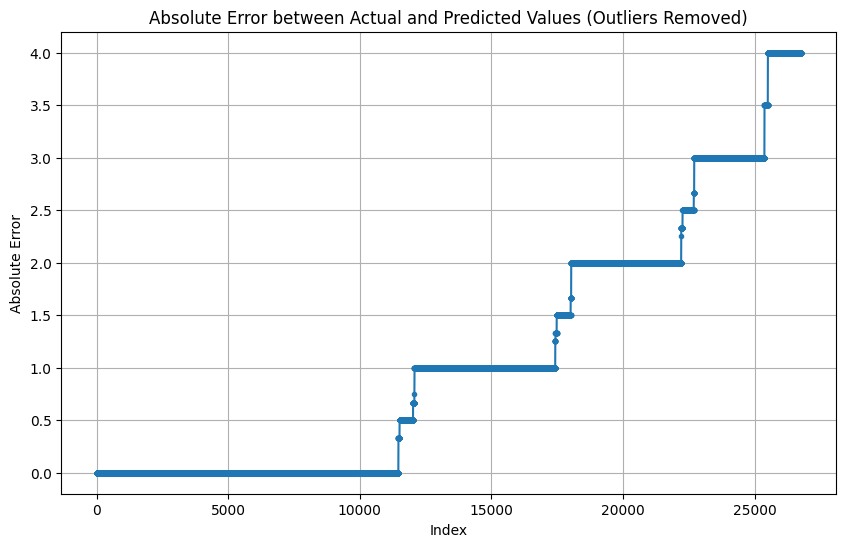

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(x3, marker='.')
plt.title('Absolute Error between Actual and Predicted Values (Outliers Removed)')
plt.xlabel('Index')
plt.ylabel('Absolute Error')
plt.grid(True)
plt.show()

In [59]:
# print(classification_report(yorderitemquantity_test, yorderitemquantity_pred))

# RandomForestRegressor

In [60]:
model_orderitemquantity = RandomForestRegressor(n_estimators=100,max_depth=10, random_state=40)
yorderitemquantity_test,yorderitemquantity_pred = regressionmodel(model_orderitemquantity,xorderitemquantity_train, xorderitemquantity_test,yorderitemquantity_train,yorderitemquantity_test)
df = pd.DataFrame({"Actual": yorderitemquantity_test, "Predict": yorderitemquantity_pred})

Model parameter used are: RandomForestRegressor(max_depth=10, random_state=40)
MAE of Total amount per order is         : 0.7909517083681185
RMSE of Total amount per order is        : 1.1487147304804517


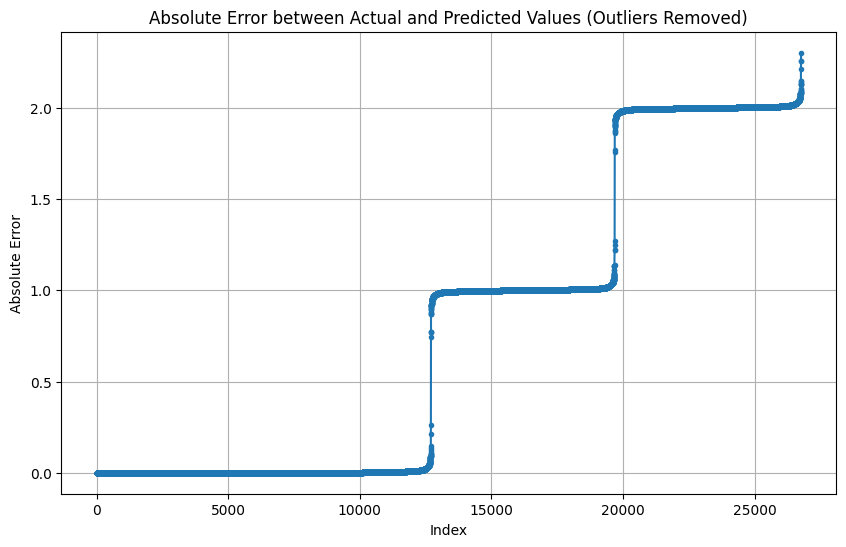

In [61]:
df['Abs_Error'] = abs(df['Actual'] - df['Predict'])

# Sort the DataFrame based on absolute error
df_sorted = df.sort_values(by='Abs_Error')

x1=df_sorted['Actual'].to_numpy()
x2=df_sorted['Predict'].to_numpy()
x3=df_sorted['Abs_Error'].to_numpy()
plt.figure(figsize=(10, 6))
plt.plot(x3, marker='.')
plt.title('Absolute Error between Actual and Predicted Values (Outliers Removed)')
plt.xlabel('Index')
plt.ylabel('Absolute Error')
plt.grid(True)
plt.show()

In [62]:
# print(classification_report(yorderitemquantity_test, yorderitemquantity_pred))

In [63]:
# rf_cm = confusion_matrix(yorderitemquantity_test, yorderitemquantity_pred)
# plt.figure(figsize=(10,7))
# sns.heatmap(rf_cm, annot=True, fmt='g', cmap='Blues')
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.show()

# xgboost

In [64]:
yorderitemquantity_train1 = yorderitemquantity_train-1
yorderitemquantity_test1= yorderitemquantity_test-1

In [65]:
import xgboost as xgb

model_orderitemquantity = xgb.XGBClassifier(objective='multi:softprob', learning_rate=0.01, random_state=42)
# regressionmodel(model_orderitemquantity,xorderitemquantity_train, xorderitemquantity_test,yorderitemquantity_train,yorderitemquantity_test)
model_orderitemquantity.fit(xorderitemquantity_train, yorderitemquantity_train1,eval_set=[(xorderitemquantity_test, yorderitemquantity_test1)])
yorderitemquantity_pred = model_orderitemquantity.predict(xorderitemquantity_test)
df =pd.DataFrame({"Actual": yorderitemquantity_test1, "Predict": yorderitemquantity_pred})


[0]	validation_0-mlogloss:1.60086
[1]	validation_0-mlogloss:1.59251
[2]	validation_0-mlogloss:1.58437
[3]	validation_0-mlogloss:1.57643
[4]	validation_0-mlogloss:1.56869
[5]	validation_0-mlogloss:1.56114
[6]	validation_0-mlogloss:1.55377
[7]	validation_0-mlogloss:1.54656
[8]	validation_0-mlogloss:1.53952
[9]	validation_0-mlogloss:1.53264
[10]	validation_0-mlogloss:1.52591
[11]	validation_0-mlogloss:1.51932
[12]	validation_0-mlogloss:1.51288
[13]	validation_0-mlogloss:1.50657
[14]	validation_0-mlogloss:1.50039
[15]	validation_0-mlogloss:1.49433
[16]	validation_0-mlogloss:1.48840
[17]	validation_0-mlogloss:1.48259
[18]	validation_0-mlogloss:1.47688
[19]	validation_0-mlogloss:1.47129
[20]	validation_0-mlogloss:1.46581
[21]	validation_0-mlogloss:1.46042
[22]	validation_0-mlogloss:1.45514
[23]	validation_0-mlogloss:1.44995
[24]	validation_0-mlogloss:1.44486
[25]	validation_0-mlogloss:1.43986
[26]	validation_0-mlogloss:1.43494
[27]	validation_0-mlogloss:1.43012
[28]	validation_0-mlogloss:1.4

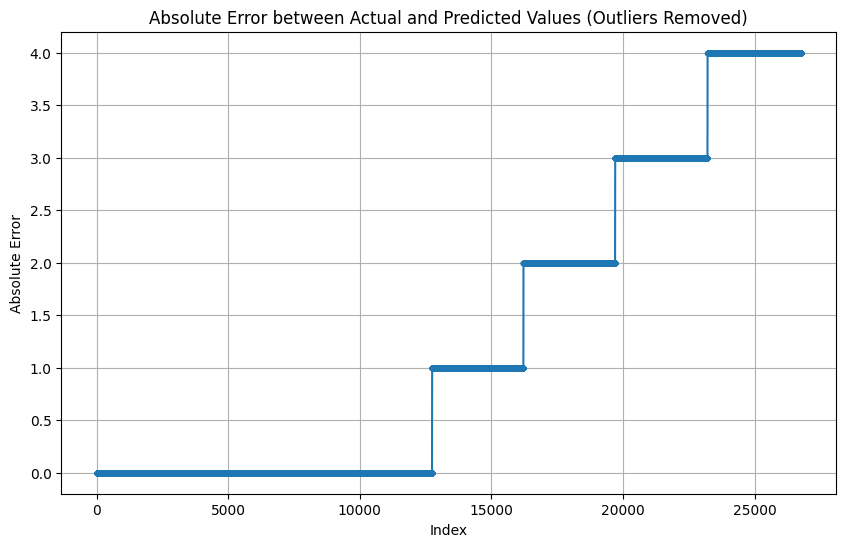

In [66]:
df['Abs_Error'] = abs(df['Actual'] - df['Predict'])

# Sort the DataFrame based on absolute error
df_sorted = df.sort_values(by='Abs_Error')

x1=df_sorted['Actual'].to_numpy()
x2=df_sorted['Predict'].to_numpy()
x3=df_sorted['Abs_Error'].to_numpy()
plt.figure(figsize=(10, 6))
plt.plot(x3, marker='.')
plt.title('Absolute Error between Actual and Predicted Values (Outliers Removed)')
plt.xlabel('Index')
plt.ylabel('Absolute Error')
plt.grid(True)
plt.show()

In [67]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [10, 20],
    'n_estimators': [200],
    'subsample': [0.8]
}

grid_search = GridSearchCV(model_orderitemquantity, param_grid, cv=5, verbose=2, n_jobs=1)
grid_search.fit(xorderitemquantity_train, yorderitemquantity_train1, yorderitemquantity_train1,eval_set=[(xorderitemquantity_test, yorderitemquantity_test1)])

TypeError: fit() takes from 2 to 3 positional arguments but 4 were given

In [ ]:



model_orderitemquantity = xgb.XGBClassifier(objective='multi:softprob', learning_rate=0.01, random_state=42)
# regressionmodel(model_orderitemquantity,xorderitemquantity_train, xorderitemquantity_test,yorderitemquantity_train,yorderitemquantity_test)
model_orderitemquantity.fit(xorderitemquantity_train, yorderitemquantity_train1,eval_set=[(xorderitemquantity_test, yorderitemquantity_test1)])
yorderitemquantity_pred = model_orderitemquantity.predict(xorderitemquantity_test)
df =pd.DataFrame({"Actual": yorderitemquantity_test1, "Predict": yorderitemquantity_pred})

df =pd.DataFrame({"Actual": yorderitemquantity_test1, "Predict": yorderitemquantity_pred})